In [2]:
import torch
import math
import os
from bvh import Bvh
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

spine1,neck,LeftShoulder,RightShoulder都是同一个关节
(1:4)
Hips.X,Hips.Y,Hips.Z,
<!-- LowerBack.X,LowerBack.Y,LowerBack.Z, -->
(7:13)
Spine.X,Spine.Y,Spine.Z,Spine1.X,Spine1.Y,Spine1.Z,
(13:25)
RightShoulder.X,RightShoulder.Y,RightShoulder.Z,RightArm.X,RightArm.Y,RightArm.Z,RightForeArm.X,RightForeArm.Y,RightForeArm.Z,RightHand.X,RightHand.Y,RightHand.Z,
<!-- RThumb.X,RThumb.Y,RThumb.Z,RThumbEnd.X,RThumbEnd.Y,RThumbEnd.Z,RightFingerBase.X,RightFingerBase.Y,RightFingerBase.Z,RightHandIndex1.X,RightHandIndex1.Y,RightHandIndex1.Z,RightHandIndex1End.X,RightHandIndex1End.Y,RightHandIndex1End.Z, -->
(40:52)
LeftShoulder.X,LeftShoulder.Y,LeftShoulder.Z,LeftArm.X,LeftArm.Y,LeftArm.Z,LeftForeArm.X,LeftForeArm.Y,LeftForeArm.Z,LeftHand.X,LeftHand.Y,LeftHand.Z,
<!-- LThumb.X,LThumb.Y,LThumb.Z,LThumbEnd.X,LThumbEnd.Y,LThumbEnd.Z,LeftFingerBase.X,LeftFingerBase.Y,LeftFingerBase.Z,LeftHandIndex1.X,LeftHandIndex1.Y,LeftHandIndex1.Z,LeftHandIndex1End.X,LeftHandIndex1End.Y,LeftHandIndex1End.Z, -->
<!-- Neck.X,Neck.Y,Neck.Z, -->
(70,76)
Neck1.X,Neck1.Y,Neck1.Z,Head.X,Head.Y,Head.Z,
<!-- HeadEnd.X,HeadEnd.Y,HeadEnd.Z,RHipJoint.X,RHipJoint.Y,RHipJoint.Z, -->
(82:91)
RightUpLeg.X,RightUpLeg.Y,RightUpLeg.Z,RightLeg.X,RightLeg.Y,RightLeg.Z,RightFoot.X,RightFoot.Y,RightFoot.Z,
<!-- RightToeBase.X,RightToeBase.Y,RightToeBase.Z,RightToeBaseEnd.X,RightToeBaseEnd.Y,RightToeBaseEnd.Z,LHipJoint.X,LHipJoint.Y,LHipJoint.Z, -->
(100:109)
LeftUpLeg.X,LeftUpLeg.Y,LeftUpLeg.Z,LeftLeg.X,LeftLeg.Y,LeftLeg.Z,LeftFoot.X,LeftFoot.Y,LeftFoot.Z,
<!-- LeftToeBase.X,LeftToeBase.Y,LeftToeBase.Z,LeftToeBaseEnd.X,LeftToeBaseEnd.Y,LeftToeBaseEnd.Z -->

(57,)
(48,)
[ 10.4117      16.684      -29.9168      10.12459055  20.78720112
 -29.71588381   9.99540814  22.35614886 -29.71778151  10.06457723
  23.90395838 -29.93124931   6.60916471  21.37663355 -30.17889963
   5.93293244  16.52406824 -29.05599202   5.97755598  14.76148209
 -26.1907031   13.60123808  21.9142965  -29.52427488  13.37270028
  17.32920624 -31.13492931  13.92872885  14.02484753 -31.31295859
   8.61686402  14.99921101 -29.49860224   9.70827861   7.68037032
 -31.17524595  10.86325368   1.1856869  -34.09873892  11.8306504
  14.84020935 -28.93074689  10.71475931   8.3402687  -25.16643058
  10.0989997    1.14586718 -24.18445277]


/tmp/ipykernel_596243/1988883351.py:35: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 7.5
/tmp/ipykernel_596243/1988883351.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(xp, yp, zp, cmap='Greens')


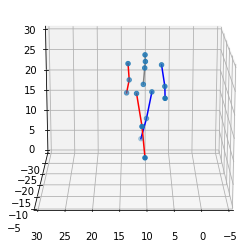

In [58]:
csv_path = "/home/liumin/litianyi/workspace/data/EgoMotion/keypoints/02_01_worldpos.csv"
df = pd.read_csv(csv_path,usecols=[1,2,3,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
                                   40,41,42,43,44,45,46,47,48,49,50,51,70,71,72,73,74,75,
                                   82,83,84,85,86,87,88,89,90,100,101,102,103,104,105,106,107,108])
# step = 4
keypoints = df.iloc[2].values
#(hips,spine1,neck1,head,rightarm,rightforearm,righthand,leftarm,leftforearm,lefthand,
# rightupleg,rigthleg,rightfoot,leftupleg,leftleg,leftfoot)
keypoint = np.concatenate([keypoints[0:3],keypoints[6:9],keypoints[33:39],keypoints[12:21],
                           keypoints[24:33],keypoints[39:48], keypoints[48:57]])
print(keypoint.shape)
print(keypoint)
DrawSkeleton(keypoint)

In [57]:
# keypoints: ndarray [1, 48]
def DrawSkeleton(keypoints, offset=None, head1=None, head2=None, image_name='Skeleton.jpg'):
    pos_x = keypoints[0:len(keypoints):3]
    pos_z = keypoints[1:len(keypoints):3]
    pos_y = keypoints[2:len(keypoints):3]
    if offset is not None:
        pos_x = pos_x - offset[0]
        pos_y = pos_y - offset[1]
        pos_z = pos_z - offset[2]
    head = keypoints[15:18]

    xp = pos_x.T
    yp = pos_y.T
    zp = pos_z.T
    ax = plt.axes(projection='3d')
    if head1==None and head2==None:
        pass
    else:
        f = head1
        f = f/np.sqrt((f[0]**2 + f[1]**2 + f[2]**2))
        print(f)
        u = head2
        u = u/np.sqrt((u[0]**2 + u[1]**2 + u[2]**2))
        print(u)
        #画起点为head,终点为f_end的向量
        ax.quiver(head[0], head[1], head[2], f[0]*10, f[1]*10, f[2]*10, color='green', arrow_length_ratio=0.2)
        #画起点为head,终点为u_end的向量
        ax.quiver(head[0], head[1], head[2], u[0]*10, u[1]*10, u[2]*10, color='blue', arrow_length_ratio=0.2)
    radius = 30
    ax.set_xlim3d([-5, radius])
    ax.set_ylim3d([-radius, -5])
    ax.set_zlim3d([0, radius])
    ax.view_init(elev=15, azim=90)
    
    ax.dist = 7.5

    # 3D scatter
    ax.scatter3D(xp, yp, zp, cmap='Greens')
    
    # hips, spine1, neck1, head, 
    ax.plot(xp[0:4], yp[0:4], zp[0:4], ls='-', color='gray')
    
    # RightArm, RightForeArm, RightHand
    ax.plot(xp[4:7], yp[4:7], zp[4:7], ls='-', color='blue')
    # LeftArm, LeftForeArm, LeftHand
    ax.plot(xp[7:10], yp[7:10], zp[7:10], ls='-', color='red')
    # RightUpLeg, RightLeg, RightFoot
    ax.plot(xp[10:13], yp[10:13], zp[10:13], ls='-', color='blue')
    # LeftUpLeg, LeftLeg, LeftFoot
    ax.plot(xp[13:16], yp[13:16], zp[13:16], ls='-', color='red')

    plt.savefig(image_name, dpi=300)

In [4]:
torch.zeros(1,48)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [1]:
import torchvision.models as models
backbone_model = models.resnet101(pretrained=True)
print(backbone_model)

/home/liumin/anaconda3/envs/baseline/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/liumin/anaconda3/envs/baseline/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/liumin/anaconda3/envs/baseline/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resne

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 